<a href="https://colab.research.google.com/github/HeNeos/Reports-FIM-UNI/blob/master/MC516-C%C3%A1lculo%20por%20elementos%20finitos/PC%206/MC516_PC6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.cm as cm
import pandas as pd 
plt.style.use('bmh')
#path = '/content/drive/My Drive/Colab Notebooks/MC516/PC6/'

# Define turbo colormap

In [2]:
from matplotlib.colors import ListedColormap
turbo_colormap_data = [[0.18995,0.07176,0.23217],[0.19483,0.08339,0.26149],[0.19956,0.09498,0.29024],[0.20415,0.10652,0.31844],[0.20860,0.11802,0.34607],[0.21291,0.12947,0.37314],[0.21708,0.14087,0.39964],[0.22111,0.15223,0.42558],[0.22500,0.16354,0.45096],[0.22875,0.17481,0.47578],[0.23236,0.18603,0.50004],[0.23582,0.19720,0.52373],[0.23915,0.20833,0.54686],[0.24234,0.21941,0.56942],[0.24539,0.23044,0.59142],[0.24830,0.24143,0.61286],[0.25107,0.25237,0.63374],[0.25369,0.26327,0.65406],[0.25618,0.27412,0.67381],[0.25853,0.28492,0.69300],[0.26074,0.29568,0.71162],[0.26280,0.30639,0.72968],[0.26473,0.31706,0.74718],[0.26652,0.32768,0.76412],[0.26816,0.33825,0.78050],[0.26967,0.34878,0.79631],[0.27103,0.35926,0.81156],[0.27226,0.36970,0.82624],[0.27334,0.38008,0.84037],[0.27429,0.39043,0.85393],[0.27509,0.40072,0.86692],[0.27576,0.41097,0.87936],[0.27628,0.42118,0.89123],[0.27667,0.43134,0.90254],[0.27691,0.44145,0.91328],[0.27701,0.45152,0.92347],[0.27698,0.46153,0.93309],[0.27680,0.47151,0.94214],[0.27648,0.48144,0.95064],[0.27603,0.49132,0.95857],[0.27543,0.50115,0.96594],[0.27469,0.51094,0.97275],[0.27381,0.52069,0.97899],[0.27273,0.53040,0.98461],[0.27106,0.54015,0.98930],[0.26878,0.54995,0.99303],[0.26592,0.55979,0.99583],[0.26252,0.56967,0.99773],[0.25862,0.57958,0.99876],[0.25425,0.58950,0.99896],[0.24946,0.59943,0.99835],[0.24427,0.60937,0.99697],[0.23874,0.61931,0.99485],[0.23288,0.62923,0.99202],[0.22676,0.63913,0.98851],[0.22039,0.64901,0.98436],[0.21382,0.65886,0.97959],[0.20708,0.66866,0.97423],[0.20021,0.67842,0.96833],[0.19326,0.68812,0.96190],[0.18625,0.69775,0.95498],[0.17923,0.70732,0.94761],[0.17223,0.71680,0.93981],[0.16529,0.72620,0.93161],[0.15844,0.73551,0.92305],[0.15173,0.74472,0.91416],[0.14519,0.75381,0.90496],[0.13886,0.76279,0.89550],[0.13278,0.77165,0.88580],[0.12698,0.78037,0.87590],[0.12151,0.78896,0.86581],[0.11639,0.79740,0.85559],[0.11167,0.80569,0.84525],[0.10738,0.81381,0.83484],[0.10357,0.82177,0.82437],[0.10026,0.82955,0.81389],[0.09750,0.83714,0.80342],[0.09532,0.84455,0.79299],[0.09377,0.85175,0.78264],[0.09287,0.85875,0.77240],[0.09267,0.86554,0.76230],[0.09320,0.87211,0.75237],[0.09451,0.87844,0.74265],[0.09662,0.88454,0.73316],[0.09958,0.89040,0.72393],[0.10342,0.89600,0.71500],[0.10815,0.90142,0.70599],[0.11374,0.90673,0.69651],[0.12014,0.91193,0.68660],[0.12733,0.91701,0.67627],[0.13526,0.92197,0.66556],[0.14391,0.92680,0.65448],[0.15323,0.93151,0.64308],[0.16319,0.93609,0.63137],[0.17377,0.94053,0.61938],[0.18491,0.94484,0.60713],[0.19659,0.94901,0.59466],[0.20877,0.95304,0.58199],[0.22142,0.95692,0.56914],[0.23449,0.96065,0.55614],[0.24797,0.96423,0.54303],[0.26180,0.96765,0.52981],[0.27597,0.97092,0.51653],[0.29042,0.97403,0.50321],[0.30513,0.97697,0.48987],[0.32006,0.97974,0.47654],[0.33517,0.98234,0.46325],[0.35043,0.98477,0.45002],[0.36581,0.98702,0.43688],[0.38127,0.98909,0.42386],[0.39678,0.99098,0.41098],[0.41229,0.99268,0.39826],[0.42778,0.99419,0.38575],[0.44321,0.99551,0.37345],[0.45854,0.99663,0.36140],[0.47375,0.99755,0.34963],[0.48879,0.99828,0.33816],[0.50362,0.99879,0.32701],[0.51822,0.99910,0.31622],[0.53255,0.99919,0.30581],[0.54658,0.99907,0.29581],[0.56026,0.99873,0.28623],[0.57357,0.99817,0.27712],[0.58646,0.99739,0.26849],[0.59891,0.99638,0.26038],[0.61088,0.99514,0.25280],[0.62233,0.99366,0.24579],[0.63323,0.99195,0.23937],[0.64362,0.98999,0.23356],[0.65394,0.98775,0.22835],[0.66428,0.98524,0.22370],[0.67462,0.98246,0.21960],[0.68494,0.97941,0.21602],[0.69525,0.97610,0.21294],[0.70553,0.97255,0.21032],[0.71577,0.96875,0.20815],[0.72596,0.96470,0.20640],[0.73610,0.96043,0.20504],[0.74617,0.95593,0.20406],[0.75617,0.95121,0.20343],[0.76608,0.94627,0.20311],[0.77591,0.94113,0.20310],[0.78563,0.93579,0.20336],[0.79524,0.93025,0.20386],[0.80473,0.92452,0.20459],[0.81410,0.91861,0.20552],[0.82333,0.91253,0.20663],[0.83241,0.90627,0.20788],[0.84133,0.89986,0.20926],[0.85010,0.89328,0.21074],[0.85868,0.88655,0.21230],[0.86709,0.87968,0.21391],[0.87530,0.87267,0.21555],[0.88331,0.86553,0.21719],[0.89112,0.85826,0.21880],[0.89870,0.85087,0.22038],[0.90605,0.84337,0.22188],[0.91317,0.83576,0.22328],[0.92004,0.82806,0.22456],[0.92666,0.82025,0.22570],[0.93301,0.81236,0.22667],[0.93909,0.80439,0.22744],[0.94489,0.79634,0.22800],[0.95039,0.78823,0.22831],[0.95560,0.78005,0.22836],[0.96049,0.77181,0.22811],[0.96507,0.76352,0.22754],[0.96931,0.75519,0.22663],[0.97323,0.74682,0.22536],[0.97679,0.73842,0.22369],[0.98000,0.73000,0.22161],[0.98289,0.72140,0.21918],[0.98549,0.71250,0.21650],[0.98781,0.70330,0.21358],[0.98986,0.69382,0.21043],[0.99163,0.68408,0.20706],[0.99314,0.67408,0.20348],[0.99438,0.66386,0.19971],[0.99535,0.65341,0.19577],[0.99607,0.64277,0.19165],[0.99654,0.63193,0.18738],[0.99675,0.62093,0.18297],[0.99672,0.60977,0.17842],[0.99644,0.59846,0.17376],[0.99593,0.58703,0.16899],[0.99517,0.57549,0.16412],[0.99419,0.56386,0.15918],[0.99297,0.55214,0.15417],[0.99153,0.54036,0.14910],[0.98987,0.52854,0.14398],[0.98799,0.51667,0.13883],[0.98590,0.50479,0.13367],[0.98360,0.49291,0.12849],[0.98108,0.48104,0.12332],[0.97837,0.46920,0.11817],[0.97545,0.45740,0.11305],[0.97234,0.44565,0.10797],[0.96904,0.43399,0.10294],[0.96555,0.42241,0.09798],[0.96187,0.41093,0.09310],[0.95801,0.39958,0.08831],[0.95398,0.38836,0.08362],[0.94977,0.37729,0.07905],[0.94538,0.36638,0.07461],[0.94084,0.35566,0.07031],[0.93612,0.34513,0.06616],[0.93125,0.33482,0.06218],[0.92623,0.32473,0.05837],[0.92105,0.31489,0.05475],[0.91572,0.30530,0.05134],[0.91024,0.29599,0.04814],[0.90463,0.28696,0.04516],[0.89888,0.27824,0.04243],[0.89298,0.26981,0.03993],[0.88691,0.26152,0.03753],[0.88066,0.25334,0.03521],[0.87422,0.24526,0.03297],[0.86760,0.23730,0.03082],[0.86079,0.22945,0.02875],[0.85380,0.22170,0.02677],[0.84662,0.21407,0.02487],[0.83926,0.20654,0.02305],[0.83172,0.19912,0.02131],[0.82399,0.19182,0.01966],[0.81608,0.18462,0.01809],[0.80799,0.17753,0.01660],[0.79971,0.17055,0.01520],[0.79125,0.16368,0.01387],[0.78260,0.15693,0.01264],[0.77377,0.15028,0.01148],[0.76476,0.14374,0.01041],[0.75556,0.13731,0.00942],[0.74617,0.13098,0.00851],[0.73661,0.12477,0.00769],[0.72686,0.11867,0.00695],[0.71692,0.11268,0.00629],[0.70680,0.10680,0.00571],[0.69650,0.10102,0.00522],[0.68602,0.09536,0.00481],[0.67535,0.08980,0.00449],[0.66449,0.08436,0.00424],[0.65345,0.07902,0.00408],[0.64223,0.07380,0.00401],[0.63082,0.06868,0.00401],[0.61923,0.06367,0.00410],[0.60746,0.05878,0.00427],[0.59550,0.05399,0.00453],[0.58336,0.04931,0.00486],[0.57103,0.04474,0.00529],[0.55852,0.04028,0.00579],[0.54583,0.03593,0.00638],[0.53295,0.03169,0.00705],[0.51989,0.02756,0.00780],[0.50664,0.02354,0.00863],[0.49321,0.01963,0.00955],[0.47960,0.01583,0.01055]]
cm.register_cmap('turbo', cmap=ListedColormap(turbo_colormap_data))

# Functions

In [3]:
def NaiveMultiply(A,B):
    C = np.zeros((A.shape[0],B.shape[1]))
    for i in range(0,C.shape[0]):
        for j in range(0,C.shape[1]):
            aux = 0
            for k in range(0,A.shape[1]):
                aux += A[i][k]*B[k][j]
            C[i][j] = aux
    return C
 
def nextPowerofTwo(n):
    return int(2**(ceil(log2(n))))
 
def ModifyMatrix(A):
    newA = A
    if(A.shape[1]%2 == 1):
        aux = np.zeros((A.shape[0],A.shape[1]+1))
        aux = np.insert(A,A.shape[1],0,axis=1)
        newA = aux
    if(newA.shape[0]%2 == 1):
        aux = np.zeros((newA.shape[0]+1,newA.shape[1]))
        aux = np.insert(newA,newA.shape[0],0,axis=0)
        newA = aux
    return newA
 
def FastMultiply(oldA,oldB):
    rows = oldA.shape[0]
    columns = oldB.shape[1]
    if(rows <= 2 or columns <=2 or oldA.shape[1] <= 2 or oldB.shape[0] <= 2):
        return np.matmul(oldA,oldB)
    
    A = ModifyMatrix(oldA)
    B = ModifyMatrix(oldB)
    N1 = A.shape[0]
    N2 = A.shape[1]
    N3 = B.shape[0]
    N4 = B.shape[1]
    
 
    a = A[0:N1//2,0:N2//2]
    b = A[0:N1//2,N2//2:N2//2+N2//2]
    c = A[N1//2:N1//2+N1//2,0:N2//2]
    d = A[N1//2:N1//2+N1//2,N2//2:N2//2+N2//2]
    
    e = B[0:N3//2,0:N4//2]
    f = B[0:N3//2,N4//2:N4//2+N4//2]
    g = B[N3//2:N3//2+N3//2,0:N4//2]
    h = B[N3//2:N3//2+N3//2,N4//2:N4//2+N4//2]
    
    
    p1 = FastMultiply(a,(f-h))
    p3 = FastMultiply((c+d),e)
    p2 = FastMultiply((a+b),h)
    p4 = FastMultiply(d,(g-e))
    p5 = FastMultiply((a+d),(e+h))
    p6 = FastMultiply((b-d),(g+h))
    p7 = FastMultiply((a-c),(e+f))
    
    
    C = np.zeros((rows,columns))
    
    c11 = p5 + p4 - p2 + p6
    c12 = p1 + p2
    c21 = p3 + p4
    c22 = p1 + p5 - p3 - p7
    
 
    
    for i in range(0,N1//2):
        for j in range(0,N4//2):
            C[i][j] = c11[i][j]
            if(j + N4//2 < columns):
                C[i][j+N4//2] = c12[i][j]
            if(i + N1//2 < rows):
                C[i+N1//2][j] = c21[i][j]
                if(j + N4//2 < columns):
                    C[i+N1//2][j+N4//2] = c22[i][j]
    return C

In [4]:
def conjugate_grad(A, b, x=None):
    n = b.shape[0]
    if not x:
        x = np.ones((n,1))
    r = np.dot(A, x) - b
    p = - r
    r_k_norm = FastMultiply(np.transpose(r), r)
    for i in range(n*n):
        Ap = np.dot(A, p)
        alpha = r_k_norm /FastMultiply(np.transpose(p), Ap)
        x += alpha * p
        r += alpha * Ap
        r_kplus1_norm = FastMultiply(np.transpose(r), r)
        if np.sqrt(r_kplus1_norm) < 1e-6:
            break
        beta = r_kplus1_norm / r_k_norm
        r_k_norm = r_kplus1_norm
        p = beta * p - r
    return x

In [5]:
NodesCondition = []
ForcesCondition = []

def DistNodes(f,s):
    if(s[0] == f[0]):
        aux = np.pi/2
        if(s[1] < f[1]):
             aux *= -1
        return (np.sqrt((s[0]-f[0])**2+(s[1]-f[1])**2),aux)
    else:
        aux = np.arctan((s[1]-f[1])/(s[0]-f[0]))
    if(aux < 0 and s[1] > f[1]):
        aux += np.pi
    if(s[1] < f[1]):
        aux += np.pi
        if(s[0] > f[0]):
            aux += np.pi

    return (np.sqrt((s[0]-f[0])**2+(s[1]-f[1])**2),aux)
 
 
def UBoundaryCondition(nU,u,i):
    nU[i][0] = u
    NodesCondition.append(i)
 
def FBoundaryCondition(nF,f,i):
    nF[i][0] += f
    ForcesCondition.append(i)

def ElementStiffness(l,angle,A,I):
    w = [A*np.cos(angle)**2+12*I*np.sin(angle)**2/(l*l),
         A*np.sin(angle)**2+12*I*np.cos(angle)**2/(l*l),
         (A-12*I/(l*l))*np.cos(angle)*np.sin(angle),
         6*I*np.sin(angle)/l,
         6*I*np.cos(angle)/l]
    aux = [[w[0],w[2],-w[3],-w[0],-w[2],-w[3]],
           [w[2],w[1],w[4],-w[2],-w[1],w[4]],
           [-w[3],w[4],4*I,w[3],-w[4],2*I],
           [-w[0],-w[2],w[3],w[0],w[2],w[3]],
           [-w[2],-w[1],-w[4],w[2],w[1],-w[4]],
           [-w[3],w[4],2*I,w[3],-w[4],4*I]]
    aux = np.array(aux)
    aux = aux*E/l
    return aux

def AssemblyStiffness(nStiffnessMatrix,k,i,j):
    for p in range(0,3):
        for m in range(0,3):
            nStiffnessMatrix[3*i+p][3*i+m] += k[p][m]
            nStiffnessMatrix[3*i+p][3*j+m] += k[p][3+m]
            nStiffnessMatrix[3*j+p][3*i+m] += k[p+3][m]
            nStiffnessMatrix[3*j+p][3*j+m] += k[p+3][3+m]
 
def Initialize(nStiffnessMatrix,nU,nF):
    for i in range(0,Nodes):
        nU[i][0] = 0
        nF[i][0] = 0
    for i in range(0,NumberOfElement):
        AssemblyStiffness(nStiffnessMatrix,K[i],int(Elements[i][0]),int(Elements[i][1]))

def TMatrix(nT,i,angle):
    nT[2*i][2*i] = np.cos(angle)
    nT[2*i][2*i+1] = np.sin(angle)
    nT[2*i+1][2*i] = -np.sin(angle)
    nT[2*i+1][2*i+1] = np.cos(angle)

def ApplyT(nStiffnessMatrix, nT):
    return FastMultiply(FastMultiply(nT,nStiffnessMatrix),np.transpose(nT))

def PreSolvingStiffness(nStiffnessMatrix):
    nsize = Nodes-len(NodesCondition)
    newStiffness = np.zeros((nsize,nsize))
    contr = -1
    for i in range(0,Nodes):
        contc = -1
        flagr = False
        for k in range(0,len(NodesCondition)):
            if(i == NodesCondition[k]):
                flagr = True
                break
        if(flagr):
            continue
        contr += 1
        for j in range(0,Nodes):
            flagc = False
            for k in range(0,len(NodesCondition)):
                if(j == NodesCondition[k]):
                    flagc = True
                    break
            if(flagc):
                continue
            contc += 1
            newStiffness[contr][contc] = nStiffnessMatrix[i][j]
    return newStiffness
 
 
def PreSolvingF(nF,nS,nU):
    nsize = Nodes-len(NodesCondition)
    newF = np.zeros(nsize).reshape(nsize,1)
    contr = -1
    for i in range(0,Nodes):
        flagr = False
        for k in range(0,len(NodesCondition)):
            if(i == NodesCondition[k]):
                flagr = True
                break
        if(flagr):
            for k in range(0,Nodes):
                nF[k][0] = nF[k][0]-nS[k][i]*nU[i][0]
            continue
 
            
    for i in range(0,Nodes):
        flagr = False
        for k in range(0,len(NodesCondition)):
            if(i == NodesCondition[k]):
                flagr = True
                break
        if(flagr):
            continue
        contr += 1
        newF[contr][0] = nF[i][0]
    
    return newF
                      
 
def Solve(nStiffnessMatrix,nU,nF):
    newStiffness = PreSolvingStiffness(nStiffnessMatrix)
    newF = PreSolvingF(nF,nStiffnessMatrix,nU)
    u = conjugate_grad(newStiffness,newF)    
    #u = np.linalg.solve(newStiffness,newF)
    contr = -1
    for i in range(0,Nodes):
        flagr = False
        for k in range(0,len(NodesCondition)):
            if(i == NodesCondition[k]):
                flagr = True
                break
        if(flagr):
            continue
        contr += 1
        nU[i][0] = u[contr][0]
    nnF = FastMultiply(StiffnessMatrix,nU)
    return nU,nnF

# Original problem (1 Element = 1 Element)

In [6]:
NodesCondition = []
Nodes = 5
Nodes *= 3
NumberOfElement = 7
h = 1500 #mm
E = 3.2e5 #MPA
K = []
A = (0.25*np.pi*(50)**2) #mm^2
I = (np.pi*50**4)/64 #mm^4
L = []
P_A = 5000 #N
P_B = 4200 #N 
P_C = 2500 #N 
P_E = 3000 #N

#PosNodes = np.array([(0,0),(h,0),(0,h),(h,h),(h,2*h)])
#Elements = np.array([(0,2),(1,2),(1,3),(2,3),(2,4),(3,4)])

PosNodes = np.array([(0,0),(0,h),(h,0),(h,h),(2*h,h)])
Elements = np.array([(0,2),(1,2),(1,3),(2,3),(2,4),(3,4),(0,1)])


for i in range(0,NumberOfElement):
    L.append(DistNodes(PosNodes[Elements[i][0]],PosNodes[Elements[i][1]]))

L = np.array(L)


for i in range(0,NumberOfElement):
    K.append(ElementStiffness(L[i][0],L[i][1],A,I))


StiffnessMatrix = np.zeros((Nodes,Nodes))

U = np.zeros(Nodes).reshape(Nodes,1)
F = np.zeros(Nodes).reshape(Nodes,1)

Initialize(StiffnessMatrix,U,F)

#Node in UBoundary = Node*3+(x=0,y=1,theta=2)
UBoundaryCondition(U,0,3*0+0) #Nodo 0 en X
UBoundaryCondition(U,0,3*0+1) #Nodo 0 en Y
UBoundaryCondition(U,0,3*0+2) #Nodo 0 en theta
UBoundaryCondition(U,0,3*1+0) #Nodo 1 en X
UBoundaryCondition(U,0,3*1+1) #Nodo 1 en Y
UBoundaryCondition(U,0,3*1+2) #Nodo 1 en theta

FBoundaryCondition(F,-P_C,3*2+1) #Nodo 2 en Y
FBoundaryCondition(F,-P_E,3*3+1) #Nodo 3 en Y
FBoundaryCondition(F,-P_B,3*4+1) #Nodo 4 en Y
FBoundaryCondition(F,P_A,3*4+0) #Nodo 4 en X


U,F=Solve(StiffnessMatrix,U,F)
print("Stiffness Matrix:\n",StiffnessMatrix,'\n')
print("Displacements:")
for i in range((U.shape[0])//3):
    print('[',U[3*i][0],',',U[3*i+1][0],',',U[3*i+2][0],']')
print("\nForces:")
for i in range((F.shape[0])//3):
    print('[',F[3*i][0],',',F[3*i+1][0],',',F[3*i+2][0],']')

Stiffness Matrix:
 [[ 4.19228086e+05  2.56275685e-11 -2.61799388e+05 -3.49065850e+02
  -2.56275685e-11 -2.61799388e+05 -4.18879020e+05  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.56275685e-11  4.19228086e+05  2.61799388e+05 -2.56275685e-11
  -4.18879020e+05  1.60305891e-11  0.00000000e+00 -3.49065850e+02
   2.61799388e+05  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-2.61799388e+05  2.61799388e+05  5.23598776e+08  2.61799388e+05
  -1.60305891e-11  1.30899694e+08  0.00000000e+00 -2.61799388e+05
   1.30899694e+08  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-3.49065850e+02 -2.56275685e-11  2.61799388e+05  5.67385891e+05
  -1.48034391e+05  3.54359449e+05 -1.48157805e+05  1.48034391e+05
   9.25600612e+04 -4.18879020e+05  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0

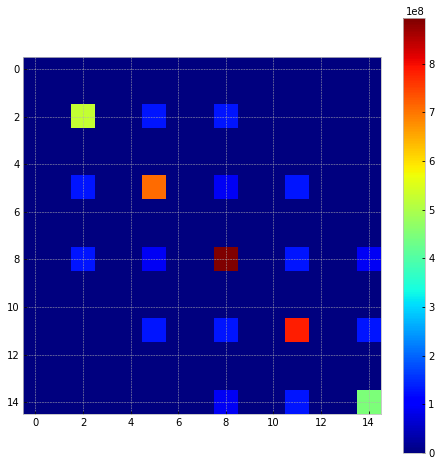

In [7]:
plt.figure(figsize=(8,8))
plt.imshow(StiffnessMatrix,cmap='jet')
plt.colorbar()

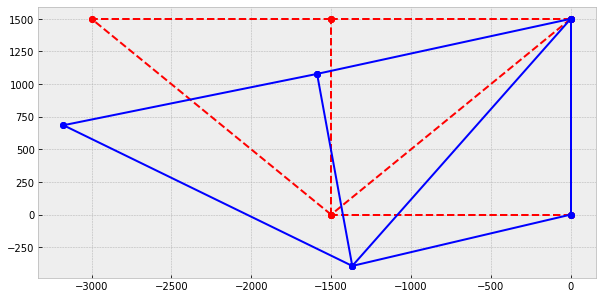

In [8]:
plt.figure(figsize=(10,5))
for i in range(0,NumberOfElement):
    f = 0
    inp = Elements[i][0]
    out = Elements[i][1]
    x1 = -1*PosNodes[inp][0] -f*U[3*inp][0]
    y1 = PosNodes[inp][1]+f*U[3*inp+1][0]
    x2 = -1*PosNodes[out][0]-f*U[3*out][0]
    y2 = PosNodes[out][1]+f*U[3*out+1][0]
    plt.plot(np.linspace(x1,x2,2),np.linspace(y1,y2,2),'--ro')
for i in range(0,NumberOfElement):
    f = 4000
    inp = Elements[i][0]
    out = Elements[i][1]
    x1 = -1*PosNodes[inp][0] -f*U[3*inp][0]
    y1 = PosNodes[inp][1]+f*U[3*inp+1][0]
    x2 = -1*PosNodes[out][0]-f*U[3*out][0]
    y2 = PosNodes[out][1]+f*U[3*out+1][0]
    plt.plot(np.linspace(x1,x2,2),np.linspace(y1,y2,2),'-bo')

# General problem (Many elements :p)

In [9]:
NodesCondition = []
Nodes = 5
Nodes *= 3
NumberOfElement = 6
n = 8
Nodes = Nodes+3*(n-2)*NumberOfElement
NumberOfElement *= (n-1) 
h = 1500 #mm
E = 3.2e5 #MPA
K = []
A = (0.25*np.pi*(50)**2) #mm^2
I = (np.pi*50**4)/64 #mm^4
L = []
P_A = 5000 #N
P_B = 4200 #N 
P_C = 2500 #N 
P_E = 3000 #N

PosNodes =  []
Elements = []

for i in range(0,n):
    PosNodes.append((i*h/(n-1),0))
for i in range(1,n):
    PosNodes.append((h,i*h/(n-1)))
for i in range(1,n):
    PosNodes.append((h-i*h/(n-1),h))
for i in range(1,n-1):
    PosNodes.append((i*h/(n-1),h-i*h/(n-1)))
for i in range(1,n):
    PosNodes.append((h+i*h/(n-1),h))
for i in range(1,n-1):
    PosNodes.append((2*h-i*h/(n-1),h-i*h/(n-1)))

for i in range(0,4*n-5):
    Elements.append((i,i+1))
Elements.append((4*n-5,n-1))
Elements.append((2*n-2,4*n-4))
for i in range(4*n-4,6*n-8):
    Elements.append((i,i+1))
Elements.append((6*n-8,n-1))

PosNodes = np.array(PosNodes)
Elements = np.array(Elements)
for i in range(0,NumberOfElement):
    L.append(DistNodes(PosNodes[Elements[i][0]],PosNodes[Elements[i][1]]))

L = np.array(L)


for i in range(0,NumberOfElement):
    K.append(ElementStiffness(L[i][0],L[i][1],A,I))


StiffnessMatrix = np.zeros((Nodes,Nodes))

U = np.zeros(Nodes).reshape(Nodes,1)
F = np.zeros(Nodes).reshape(Nodes,1)

Initialize(StiffnessMatrix,U,F)

#Node in UBoundary = Node*3+(x=0,y=1,theta=2)
UBoundaryCondition(U,0,3*0+0)
UBoundaryCondition(U,0,3*0+1)
UBoundaryCondition(U,0,3*0+2)
UBoundaryCondition(U,0,3*(3*n-3)+0)
UBoundaryCondition(U,0,3*(3*n-3)+1)
UBoundaryCondition(U,0,3*(3*n-3)+2)

FBoundaryCondition(F,-P_C,3*(n-1)+1)
FBoundaryCondition(F,-P_E,3*(2*n-2)+1)
FBoundaryCondition(F,-P_B,3*(5*n-6)+1)
FBoundaryCondition(F,P_A,3*(5*n-6)+0)


U,F=Solve(StiffnessMatrix,U,F)
print("Stiffness Matrix:\n",StiffnessMatrix,'\n')
print("Displacements:")
for i in range((U.shape[0])//3):
    print('[',U[3*i][0],',',U[3*i+1][0],',',U[3*i+2][0],']')
print("\nForces:")
for i in range((F.shape[0])//3):
    print('[',F[3*i][0],',',F[3*i+1][0],',',F[3*i+2][0],']')

Stiffness Matrix:
 [[ 2.93215314e+06  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.19729587e+05  1.28281700e+07 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.28281700e+07  1.83259571e+09 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  2.11567617e+06
   2.03101457e+06  8.38190317e-09]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  2.03101457e+06
   2.11567617e+06 -8.38190317e-09]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  8.38190317e-09
  -8.38190317e-09  2.59168171e+09]] 

Displacements:
[ 0.0 , 0.0 , 0.0 ]
[ -0.004718136996341275 , -0.0035997890327550968 , -3.235653621826694e-05 ]
[ -0.00943627399267839 , -0.013335017770402696 , -5.7264103912982405e-05 ]
[ -0.01415441098901459 , -0.02760947867275332 , -7.472270308992463e-05 ]
[ -0.018872547985349156 , -0.04482696420069049 , -8.47323337519104e-05 ]
[ -0.023590

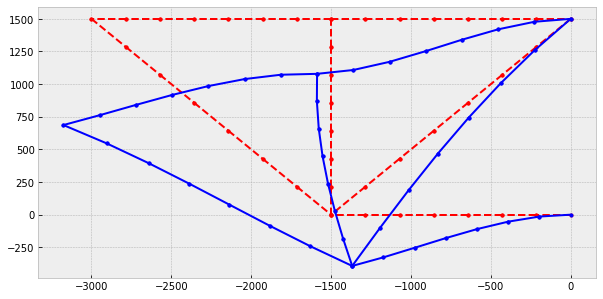

In [10]:
plt.figure(figsize=(10,5))
for i in range(0,NumberOfElement):
    f = 0
    inp = Elements[i][0]
    out = Elements[i][1]
    x1 = -1*PosNodes[inp][0] -f*U[3*inp][0]
    y1 = PosNodes[inp][1]+f*U[3*inp+1][0]
    x2 = -1*PosNodes[out][0]-f*U[3*out][0]
    y2 = PosNodes[out][1]+f*U[3*out+1][0]
    plt.plot(np.linspace(x1,x2,2),np.linspace(y1,y2,2),'--r.')
for i in range(0,NumberOfElement):
    f = 4000
    inp = Elements[i][0]
    out = Elements[i][1]
    x1 = -1*PosNodes[inp][0] -f*U[3*inp][0]
    y1 = PosNodes[inp][1]+f*U[3*inp+1][0]
    x2 = -1*PosNodes[out][0]-f*U[3*out][0]
    y2 = PosNodes[out][1]+f*U[3*out+1][0]
    plt.plot(np.linspace(x1,x2,2),np.linspace(y1,y2,2),'-b.')

#plt.savefig(path+'frame.pdf')

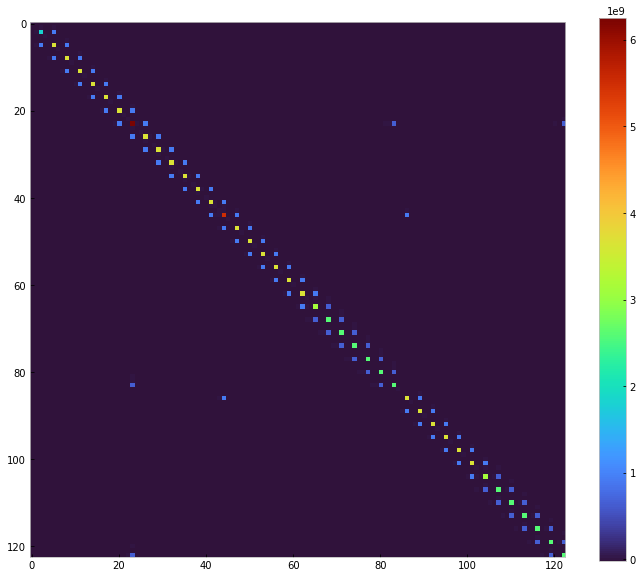

In [11]:
plt.figure(figsize=(12,10))
plt.imshow(StiffnessMatrix,cmap='turbo')
plt.grid(False)
plt.colorbar()
#plt.savefig(path+'stiffness.pdf')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


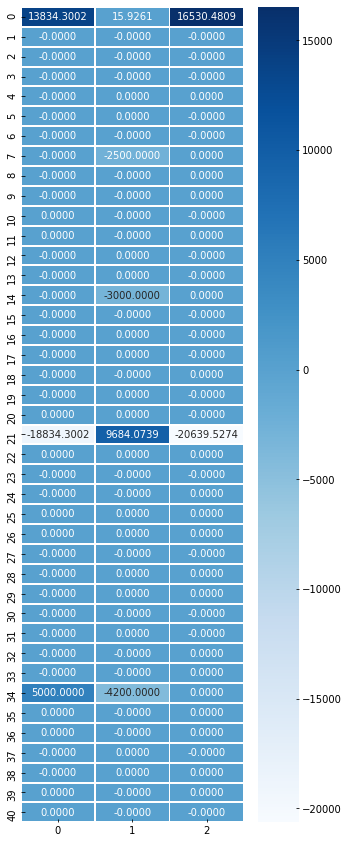

In [12]:
import seaborn as sns
nF = F.reshape(F.shape[0]//3,3)
plt.figure(figsize=(5,15))
sns.heatmap(nF,cmap='Blues',annot=True,fmt='.4f',linewidths=1)
#plt.savefig(path+'forces.pdf')

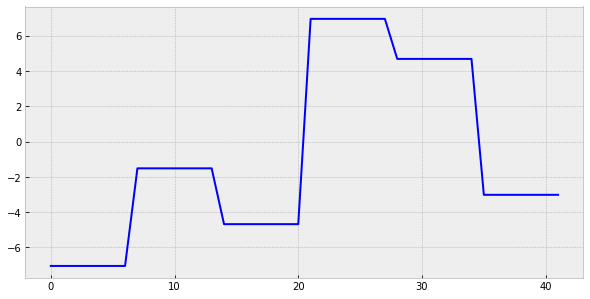

In [13]:
SigmaM = np.zeros((NumberOfElement,3))
SigmaN = np.ones(NumberOfElement)
for i in range(NumberOfElement):
    nx = np.linspace(-1,1,3)
    inp = Elements[i][0]
    out = Elements[i][1]
    angle = L[i][1]
    m = np.sin(angle)
    l = np.cos(angle)
    SigmaM[i] = (E*25/(L[i][0]**2))*(6*nx*(-U[3*inp][0]*m+U[3*inp+1][0]*l) + (3*nx-1)*L[i][0]*U[3*inp+2] -
                                     6*nx*(-U[3*out]*m+U[3*out+1]*l)+(3*nx+1)*L[i][0]*U[3*out+2])
    SigmaN[i] = (E/L[i][0])*(-U[3*inp][0]*l-U[3*inp+1][0]*m+U[3*out][0]*l+U[3*out+1][0]*m)
    
plt.figure(figsize=(10,5))
plt.plot(SigmaN,'-b')
#plt.plot(SigmaM[:,0],'-o')
#plt.plot(SigmaM[:,1],'-o')
#plt.plot(SigmaM[:,2],'-o')
#plt.legend([r'$\xi=-1$',r'$\xi=0$',r'$\xi=1$'])
#plt.savefig(path+'stressN.pdf')

# LaTeX Code

In [14]:
for i in range(NumberOfElement):
    print(i,'&',Elements[i][0],'&',Elements[i][1],'&',np.around(SigmaM[i][0],5),'&',np.around(SigmaM[i][1],5),'&',np.around(SigmaM[i][2],5),'&',np.around(SigmaN[i],5),'\\'+'\\')
    print('\\'+'hline')

0 & 0 & 1 & -1.34702 & -1.20798 & -1.06893 & -7.04575 \\
\hline
1 & 1 & 2 & -1.06893 & -0.92988 & -0.79084 & -7.04575 \\
\hline
2 & 2 & 3 & -0.79084 & -0.65179 & -0.51274 & -7.04575 \\
\hline
3 & 3 & 4 & -0.51274 & -0.37369 & -0.23465 & -7.04575 \\
\hline
4 & 4 & 5 & -0.23465 & -0.0956 & 0.04345 & -7.04575 \\
\hline
5 & 5 & 6 & 0.04345 & 0.1825 & 0.32154 & -7.04575 \\
\hline
6 & 6 & 7 & 0.32154 & 0.46059 & 0.59964 & -7.04575 \\
\hline
7 & 7 & 8 & 0.21903 & 0.2485 & 0.27797 & -1.51805 \\
\hline
8 & 8 & 9 & 0.27797 & 0.30744 & 0.33691 & -1.51805 \\
\hline
9 & 9 & 10 & 0.33691 & 0.36638 & 0.39585 & -1.51805 \\
\hline
10 & 10 & 11 & 0.39585 & 0.42532 & 0.45479 & -1.51805 \\
\hline
11 & 11 & 12 & 0.45479 & 0.48426 & 0.51373 & -1.51805 \\
\hline
12 & 12 & 13 & 0.51373 & 0.5432 & 0.57267 & -1.51805 \\
\hline
13 & 13 & 14 & 0.57267 & 0.60214 & 0.63161 & -1.51805 \\
\hline
14 & 14 & 15 & 2.03972 & 1.74096 & 1.4422 & -4.67924 \\
\hline
15 & 15 & 16 & 1.4422 & 1.14343 & 0.84467 & -4.67924 \\
\hli

In [15]:
f = 0.0055
for i in range(NumberOfElement):
    print('\\'+'draw[britishracinggreen] (',-f*PosNodes[Elements[i][0]][0],',',f*PosNodes[Elements[i][0]][1],') -- (',-f*PosNodes[Elements[i][1]][0],',',f*PosNodes[Elements[i][1]][1],');')
    print('\\'+'tkzLabelPoint[below](',(-0.5*f*PosNodes[Elements[i][0]][0]-0.5*f*PosNodes[Elements[i][1]][0]),',',(0.2*f*PosNodes[Elements[i][0]][1]+0.8*f*PosNodes[Elements[i][1]][1]),'){{'+'\\'+'color{blue(ryb)}',i,'}}')

for i in range(Nodes//3):
    print('\\'+'draw[fill = bostonuniversityred] (',-f*PosNodes[i][0],',',f*PosNodes[i][1],') circle(0.08);')
    print('\\'+'tkzLabelPoint[above](',-f*PosNodes[i][0],',',f*PosNodes[i][1],'){{','\\'+'footnotesize '+'\\'+'color{red}',i,'}}')

\draw[britishracinggreen] ( -0.0 , 0.0 ) -- ( -1.1785714285714284 , 0.0 );
\tkzLabelPoint[below]( -0.5892857142857142 , 0.0 ){{\color{blue(ryb)} 0 }}
\draw[britishracinggreen] ( -1.1785714285714284 , 0.0 ) -- ( -2.3571428571428568 , 0.0 );
\tkzLabelPoint[below]( -1.7678571428571426 , 0.0 ){{\color{blue(ryb)} 1 }}
\draw[britishracinggreen] ( -2.3571428571428568 , 0.0 ) -- ( -3.5357142857142856 , 0.0 );
\tkzLabelPoint[below]( -2.946428571428571 , 0.0 ){{\color{blue(ryb)} 2 }}
\draw[britishracinggreen] ( -3.5357142857142856 , 0.0 ) -- ( -4.7142857142857135 , 0.0 );
\tkzLabelPoint[below]( -4.125 , 0.0 ){{\color{blue(ryb)} 3 }}
\draw[britishracinggreen] ( -4.7142857142857135 , 0.0 ) -- ( -5.892857142857142 , 0.0 );
\tkzLabelPoint[below]( -5.303571428571428 , 0.0 ){{\color{blue(ryb)} 4 }}
\draw[britishracinggreen] ( -5.892857142857142 , 0.0 ) -- ( -7.071428571428571 , 0.0 );
\tkzLabelPoint[below]( -6.482142857142857 , 0.0 ){{\color{blue(ryb)} 5 }}
\draw[britishracinggreen] ( -7.0714285714285

# Heat maps

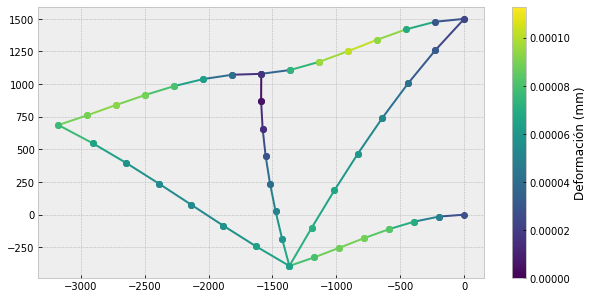

In [16]:
minStress = 0
maxStress = 0.000113
amount_of_colors = 256
mycmap = cm.viridis

#print(np.linspace(minStress,maxStress))

plt.figure(figsize=(10,5))
for i in range(0,NumberOfElement):
    f = 4000
    inp = Elements[i][0]
    out = Elements[i][1]
    x1 = -1*PosNodes[inp][0] -f*U[3*inp][0]
    y1 = PosNodes[inp][1]+f*U[3*inp+1][0]
    x2 = -1*PosNodes[out][0]-f*U[3*out][0]
    y2 = PosNodes[out][1]+f*U[3*out+1][0]
    svalue = np.sqrt((U[3*inp][0]-U[3*out][0])**2+(U[3*inp+1][0]-U[3*out+1][0])**2)/L[i][0]
    cindex = int(((svalue-minStress)*(amount_of_colors-1))/(maxStress-minStress))
    #minStress + i*(maxStress-minStress)/(amount_of_colors-1)
    plt.plot(np.linspace(x1,x2,2),np.linspace(y1,y2,2),color=mycmap(cindex),linewidth=2,marker='o')

sm = plt.cm.ScalarMappable(cmap=mycmap, norm=plt.Normalize(vmin=minStress, vmax=maxStress))
plt.colorbar(sm,label='Deformación (mm)')
#plt.savefig(path+'deformation.pdf')

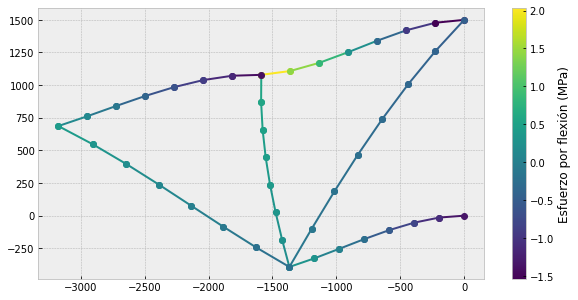

In [17]:
minStress = np.min(SigmaM[:,0])
maxStress = np.max(SigmaM[:,0])
amount_of_colors = 256
mycmap = cm.viridis
#colors = cm.jet(np.linspace(minStress, maxStress, amount_of_colors))
#print(colors)

plt.figure(figsize=(10,5))
for i in range(0,NumberOfElement):
    f = 4000
    inp = Elements[i][0]
    out = Elements[i][1]
    x1 = -1*PosNodes[inp][0] -f*U[3*inp][0]
    y1 = PosNodes[inp][1]+f*U[3*inp+1][0]
    x2 = -1*PosNodes[out][0]-f*U[3*out][0]
    y2 = PosNodes[out][1]+f*U[3*out+1][0]
    svalue = SigmaM[i][0]
    cindex = int((svalue-minStress)*(amount_of_colors-1)/(maxStress-minStress))
    #minStress + i*(maxStress-minStress)/(amount_of_colors-1)
    plt.plot(np.linspace(x1,x2,2),np.linspace(y1,y2,2),color=mycmap(cindex),linewidth=2,marker='o')

sm = plt.cm.ScalarMappable(cmap=mycmap, norm=plt.Normalize(vmin=minStress, vmax=maxStress))
plt.colorbar(sm,label='Esfuerzo por flexión (MPa)')
#plt.savefig(path+'frame_stress_M.pdf')

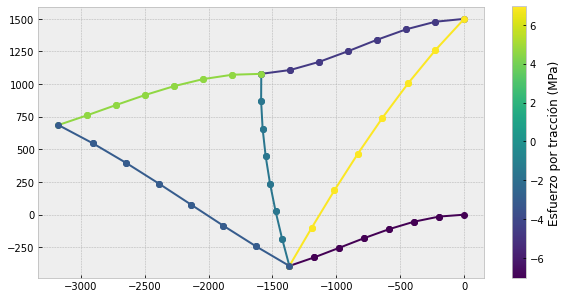

In [18]:
minStress = np.min(SigmaN)
maxStress = np.max(SigmaN)
amount_of_colors = 256
mycmap = cm.viridis

plt.figure(figsize=(10,5))
for i in range(0,NumberOfElement):
    f = 4000
    inp = Elements[i][0]
    out = Elements[i][1]
    x1 = -1*PosNodes[inp][0] -f*U[3*inp][0]
    y1 = PosNodes[inp][1]+f*U[3*inp+1][0]
    x2 = -1*PosNodes[out][0]-f*U[3*out][0]
    y2 = PosNodes[out][1]+f*U[3*out+1][0]
    svalue = SigmaN[i]
    cindex = int((svalue-minStress)*(amount_of_colors-1)/(maxStress-minStress))
    #minStress + i*(maxStress-minStress)/(amount_of_colors-1)
    plt.plot(np.linspace(x1,x2,2),np.linspace(y1,y2,2),color=mycmap(cindex),linewidth=2,marker='o')

sm = plt.cm.ScalarMappable(cmap=mycmap, norm=plt.Normalize(vmin=minStress, vmax=maxStress))
plt.colorbar(sm,label='Esfuerzo por tracción (MPa)')
#plt.savefig(path+'frame_stress_N.pdf')

# A lot of elements

In [19]:
NodesCondition = []
Nodes = 5
Nodes *= 3
NumberOfElement = 6
n = 52
Nodes = Nodes+3*(n-2)*NumberOfElement
NumberOfElement *= (n-1) 
h = 1500 #mm
E = 3.2e5 #MPA
K = []
A = (0.25*np.pi*(50)**2) #mm^2
I = (np.pi*50**4)/64 #mm^4
L = []
P_A = 5000 #N
P_B = 4200 #N 
P_C = 2500 #N 
P_E = 3000 #N

PosNodes =  []
Elements = []

for i in range(0,n):
    PosNodes.append((i*h/(n-1),0))
for i in range(1,n):
    PosNodes.append((h,i*h/(n-1)))
for i in range(1,n):
    PosNodes.append((h-i*h/(n-1),h))
for i in range(1,n-1):
    PosNodes.append((i*h/(n-1),h-i*h/(n-1)))
for i in range(1,n):
    PosNodes.append((h+i*h/(n-1),h))
for i in range(1,n-1):
    PosNodes.append((2*h-i*h/(n-1),h-i*h/(n-1)))

for i in range(0,4*n-5):
    Elements.append((i,i+1))
Elements.append((4*n-5,n-1))
Elements.append((2*n-2,4*n-4))
for i in range(4*n-4,6*n-8):
    Elements.append((i,i+1))
Elements.append((6*n-8,n-1))

PosNodes = np.array(PosNodes)
Elements = np.array(Elements)
for i in range(0,NumberOfElement):
    L.append(DistNodes(PosNodes[Elements[i][0]],PosNodes[Elements[i][1]]))

L = np.array(L)


for i in range(0,NumberOfElement):
    K.append(ElementStiffness(L[i][0],L[i][1],A,I))


StiffnessMatrix = np.zeros((Nodes,Nodes))

U = np.zeros(Nodes).reshape(Nodes,1)
F = np.zeros(Nodes).reshape(Nodes,1)

Initialize(StiffnessMatrix,U,F)

#Node in UBoundary = Node*3+(x=0,y=1,theta=2)
UBoundaryCondition(U,0,3*0+0)
UBoundaryCondition(U,0,3*0+1)
UBoundaryCondition(U,0,3*0+2)
UBoundaryCondition(U,0,3*(3*n-3)+0)
UBoundaryCondition(U,0,3*(3*n-3)+1)
UBoundaryCondition(U,0,3*(3*n-3)+2)

FBoundaryCondition(F,-P_C,3*(n-1)+1)
FBoundaryCondition(F,-P_E,3*(2*n-2)+1)
FBoundaryCondition(F,-P_B,3*(5*n-6)+1)
FBoundaryCondition(F,P_A,3*(5*n-6)+0)

U,F=Solve(StiffnessMatrix,U,F)

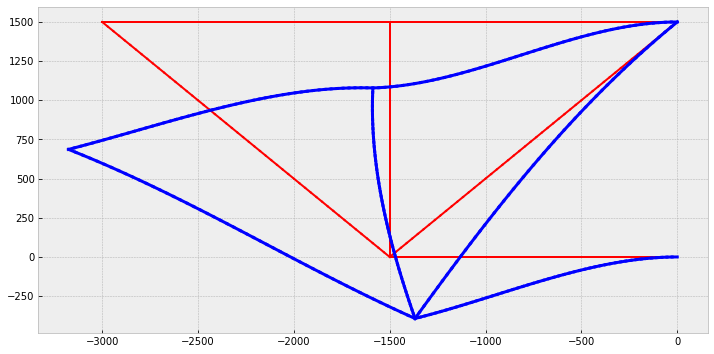

In [20]:
plt.figure(figsize=(12,6))
for i in range(0,NumberOfElement):
    f = 0
    inp = Elements[i][0]
    out = Elements[i][1]
    x1 = -1*PosNodes[inp][0] -f*U[3*inp][0]
    y1 = PosNodes[inp][1]+f*U[3*inp+1][0]
    x2 = -1*PosNodes[out][0]-f*U[3*out][0]
    y2 = PosNodes[out][1]+f*U[3*out+1][0]
    plt.plot(np.linspace(x1,x2,2),np.linspace(y1,y2,2),'-r',linewidth=2)
for i in range(0,NumberOfElement):
    f = 4000
    inp = Elements[i][0]
    out = Elements[i][1]
    x1 = -1*PosNodes[inp][0] -f*U[3*inp][0]
    y1 = PosNodes[inp][1]+f*U[3*inp+1][0]
    x2 = -1*PosNodes[out][0]-f*U[3*out][0]
    y2 = PosNodes[out][1]+f*U[3*out+1][0]
    plt.plot(np.linspace(x1,x2,2),np.linspace(y1,y2,2),'-b',linewidth=3)

#plt.savefig(path+'real_displacement.pdf')

In [21]:
SigmaM = np.zeros((NumberOfElement,3))
SigmaN = np.ones(NumberOfElement)
for i in range(NumberOfElement):
    nx = np.linspace(-1,1,3)
    inp = Elements[i][0]
    out = Elements[i][1]
    angle = L[i][1]
    m = np.sin(angle)
    l = np.cos(angle)
    SigmaM[i] = (E*25/(L[i][0]**2))*(6*nx*(-U[3*inp][0]*m+U[3*inp+1][0]*l) + (3*nx-1)*L[i][0]*U[3*inp+2] -
                                     6*nx*(-U[3*out]*m+U[3*out+1]*l)+(3*nx+1)*L[i][0]*U[3*out+2])
    SigmaN[i] = (E/L[i][0])*(-U[3*inp][0]*l-U[3*inp+1][0]*m+U[3*out][0]*l+U[3*out+1][0]*m)

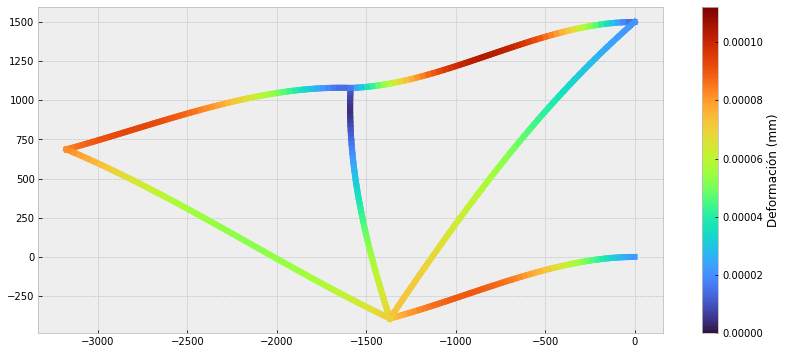

In [22]:
minStress = 0
maxStress = 0.000112
amount_of_colors = 256
mycmap = 'turbo'

plt.figure(figsize=(14,6))
for i in range(0,NumberOfElement):
    f = 4000
    inp = Elements[i][0]
    out = Elements[i][1]
    x1 = -1*PosNodes[inp][0] -f*U[3*inp][0]
    y1 = PosNodes[inp][1]+f*U[3*inp+1][0]
    x2 = -1*PosNodes[out][0]-f*U[3*out][0]
    y2 = PosNodes[out][1]+f*U[3*out+1][0]
    svalue = np.sqrt((U[3*inp][0]-U[3*out][0])**2+(U[3*inp+1][0]-U[3*out+1][0])**2)/L[i][0]
    cindex = int(((svalue-minStress)*(amount_of_colors-1))/(maxStress-minStress))
    #minStress + i*(maxStress-minStress)/(amount_of_colors-1)
    plt.plot(np.linspace(x1,x2,2),np.linspace(y1,y2,2),color=turbo_colormap_data[cindex],linewidth=6)

sm = plt.cm.ScalarMappable(cmap=mycmap, norm=plt.Normalize(vmin=minStress, vmax=maxStress))
plt.colorbar(sm,label='Deformación (mm)')
#plt.savefig(path+'real_deformation.pdf')

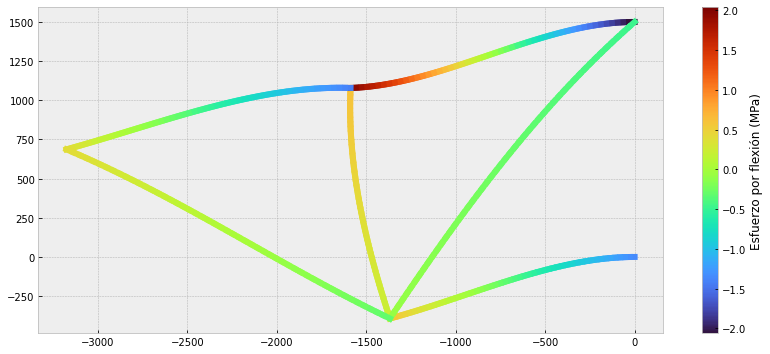

In [23]:
minStress = np.min(SigmaM[:,0])
maxStress = np.max(SigmaM[:,0])
amount_of_colors = 256
mycmap = 'turbo'

plt.figure(figsize=(14,6))
for i in range(0,NumberOfElement):
    f = 4000
    inp = Elements[i][0]
    out = Elements[i][1]
    x1 = -1*PosNodes[inp][0] -f*U[3*inp][0]
    y1 = PosNodes[inp][1]+f*U[3*inp+1][0]
    x2 = -1*PosNodes[out][0]-f*U[3*out][0]
    y2 = PosNodes[out][1]+f*U[3*out+1][0]
    svalue = SigmaM[i][0]
    cindex = int((svalue-minStress)*(amount_of_colors-1)/(maxStress-minStress))
    #minStress + i*(maxStress-minStress)/(amount_of_colors-1)
    plt.plot(np.linspace(x1,x2,2),np.linspace(y1,y2,2),color=turbo_colormap_data[cindex],linewidth=6)

sm = plt.cm.ScalarMappable(cmap=mycmap, norm=plt.Normalize(vmin=minStress, vmax=maxStress))
plt.colorbar(sm,label='Esfuerzo por flexión (MPa)')
#plt.savefig(path+'real_stress_M.pdf')

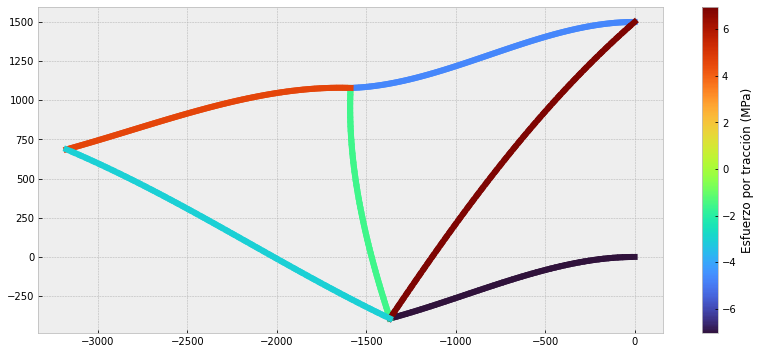

In [24]:
minStress = np.min(SigmaN)
maxStress = np.max(SigmaN)
amount_of_colors = 256
mycmap = 'turbo'

plt.figure(figsize=(14,6))
for i in range(0,NumberOfElement):
    f = 4000
    inp = Elements[i][0]
    out = Elements[i][1]
    x1 = -1*PosNodes[inp][0] -f*U[3*inp][0]
    y1 = PosNodes[inp][1]+f*U[3*inp+1][0]
    x2 = -1*PosNodes[out][0]-f*U[3*out][0]
    y2 = PosNodes[out][1]+f*U[3*out+1][0]
    svalue = SigmaN[i]
    cindex = int((svalue-minStress)*(amount_of_colors-1)/(maxStress-minStress))
    #minStress + i*(maxStress-minStress)/(amount_of_colors-1)
    plt.plot(np.linspace(x1,x2,2),np.linspace(y1,y2,2),color=turbo_colormap_data[cindex],linewidth=6)

sm = plt.cm.ScalarMappable(cmap=mycmap, norm=plt.Normalize(vmin=minStress, vmax=maxStress))
plt.colorbar(sm,label='Esfuerzo por tracción (MPa)')
#plt.savefig(path+'real_stress_N.pdf')